In [1]:
import pandas as pd
import numpy as np
from pydataset import data
from pandas_profiling import ProfileReport
import env
import wrangle
import matplotlib.pyplot as plt
import split_scale
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import explore
import evaluate

In [ ]:
tips = data('tips')

In [ ]:
tips.head()

# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [ ]:
from sklearn.model_selection import train_test_split
seed = 123

train, test = train_test_split(tips, train_size=.80, random_state=seed)

print(train.shape, test.shape)

In [ ]:
train = train[['total_bill', 'tip']]
train.head()

In [ ]:
train.columns = ['x', 'y']
train.head()

In [ ]:
train['yhat_bl'] = train.y.mean()

In [ ]:
train.head()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_bl = sqrt(mean_squared_error(train.y, train.yhat_bl))


In [ ]:
print(rmse_bl)

In [ ]:
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('y ~ x', data = train).fit()

# compute predictions and add to original dataframe
train['yhat'] = ols_model.predict(train.x)
train.head(3)

In [ ]:
rmse = sqrt(mean_squared_error(train.y, train.yhat))
rmse

# Plot the residuals for the linear regression model that you made.

In [ ]:
train['residual'] = train['yhat'] - train['y']
train['residual_baseline'] = train['yhat_bl'] - train['y']

In [ ]:
train.head()

In [ ]:
sns.scatterplot(x='y', y='residual',  data=train)
plt.figure()
sns.scatterplot(x='y', y='residual_baseline',  data=train)
plt.figure()
sns.scatterplot(x='residual', y='residual_baseline',  data=train)

# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

 # Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).




In [ ]:
from sklearn.metrics import mean_squared_error

SSE = mean_squared_error(train.y, train.yhat)*len(train)
SSE_baseline = mean_squared_error(train.y, train.yhat_bl)*len(train)

SSE, SSE_baseline

In [ ]:
ESS = sum((train.yhat - train.y.mean())**2)
ESS_baseline = sum((train.yhat_bl - train.y.mean())**2)


ESS, ESS_baseline

In [ ]:
TSS = ESS + SSE
TSS_baseline = ESS_baseline + SSE_baseline

TSS, TSS_baseline

In [ ]:
MSE = mean_squared_error(train.y, train.yhat)

MSE_baseline = mean_squared_error(train.y, train.yhat_bl)

MSE, MSE_baseline

In [ ]:
RMSE = sqrt(mean_squared_error(train.y, train.yhat))
RMSE_baseline = sqrt(mean_squared_error(train.y, train.yhat_bl))

RMSE, RMSE_baseline

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [ ]:
def (SSE_delta = SSE - SSE_baseline
ESS_delta = ESS - ESS_baseline
TSS_delta = TSS - TSS_baseline
MSE_delta = MSE - MSE_baseline
RMSE_delta = RMSE - RMSE_baseline


In [ ]:
df_eval = pd.DataFrame(np.array(['SSE','ESS', 'TSS', 'MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','ESS_baseline', 'TSS_baseline', 'MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, ESS, TSS, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, ESS_baseline,TSS_baseline,MSE_baseline, RMSE_baseline])


print(df_eval)
print(df_baseline_eval)

In [ ]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval


# What is the amount of variance explained in your model?



In [ ]:
ols_model.summary()

# Is your model significantly better than the baseline model?

The p value for F-statistic is very small. Hence the results are statisticaly significant. The model performs better than baseline with lower RMSE.

In [ ]:
evaluate.plot_residuals(train['y'], train['yhat'], train)

In [ ]:
evaluate.regression_errors(train['y'], train['yhat'], train)

In [ ]:
evaluate.baseline_mean_errors(train['y'], train)

In [ ]:
evaluate.better_than_baseline(train['y'], train['yhat'], train)

In [ ]:
evaluate.model_significance(ols_model)

# Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [2]:
mpg = data('mpg')

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
from sklearn.model_selection import train_test_split
seed = 123

train, test = train_test_split(mpg, train_size=.80, random_state=seed)

print(train.shape, test.shape)

(187, 11) (47, 11)


In [5]:
train = train[['displ', 'hwy']]
train.head()

,displ,hwy
11,2.0,27
178,4.0,20
188,2.2,29
27,6.2,25
12,2.8,25


In [6]:
train.columns = ['x', 'y']

In [7]:
from statsmodels.formula.api import ols


ols_model = ols('y ~ x', data = train).fit()

In [8]:
train['yhat'] = ols_model.predict(train.x)
train.head(3)

,x,y,yhat
11,2.0,27,28.961501
178,4.0,20,21.509483
188,2.2,29,28.216299


In [9]:
train['yhat_bl'] = train.y.mean()
train.head()

,x,y,yhat,yhat_bl
11,2.0,27,28.961501,23.812834
178,4.0,20,21.509483,23.812834
188,2.2,29,28.216299,23.812834
27,6.2,25,13.312264,23.812834
12,2.8,25,25.980694,23.812834


In [10]:
train['residual_bl'] = train['yhat_bl']- train['y']

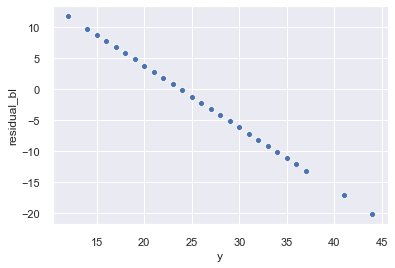

In [11]:
sns.scatterplot(x= train['y'], y = train['residual_bl'])

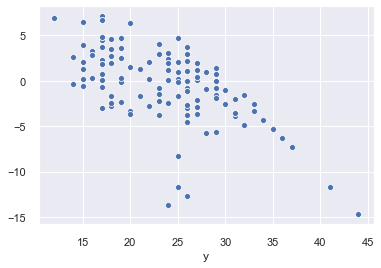

In [12]:
evaluate.plot_residuals(train['y'], train['yhat'], train)

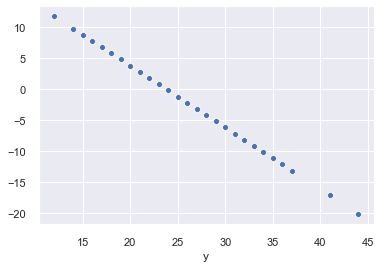

In [13]:
evaluate.plot_residuals(train['y'], train['yhat_bl'], train)

In [14]:
evaluate.regression_errors(train['y'], train['yhat'], train)

{'SSE': 2849.101802543057,
 'ESS': 4199.347395317911,
 'TSS': 7048.449197860968,
 'MSE': 15.235838516273033,
 'RMSE': 3.903311224623657}

In [15]:
evaluate.baseline_mean_errors(train['y'], train)

{'SSE_bl': 7048.449197860962,
 'MSE_bl': 37.69224169979124,
 'RMSE_bl': 6.139400760643602}

In [16]:
evaluate.better_than_baseline(train['y'], train['yhat'], train)

True

In [17]:
evaluate.model_significance(ols_model)

R-squared =  0.596
p-value for model significance =  0.0
